# Imports

In [24]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(6, 10), random_state=1)

tic=yf.Ticker('GOOG')
df=tic.history('max',interval='1m')

df=df.reset_index()
df=df.drop(['Datetime','Dividends','Stock Splits'],axis=1)

# Indicators & Neuron prepping

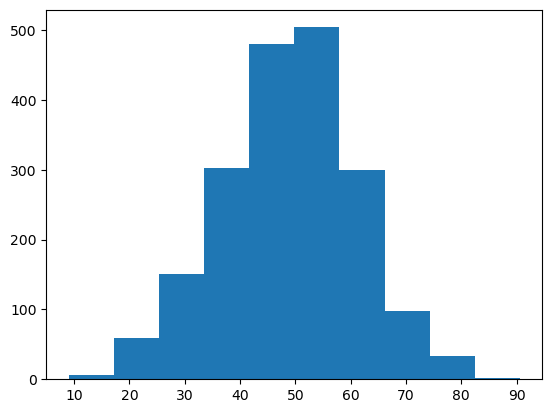

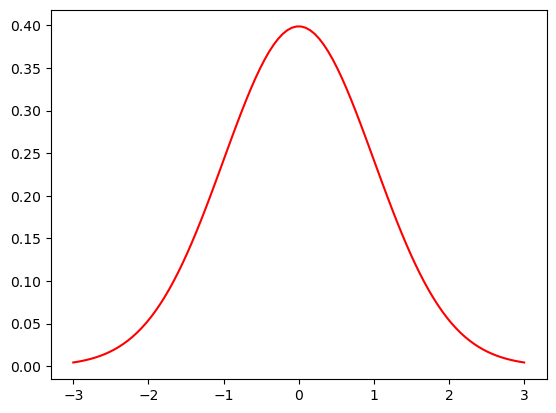

,Open,High,Low,Close,Volume,Target,RSI,Rsi Z-score,RSI d-quark,RSI u-quark,RSI lite-quark
0,143.270004,143.309998,143.235001,143.250000,0,NaN,NaN,NaN,NaN,NaN,NaN
1,143.240005,143.289993,143.160004,143.199997,65465,1.0,NaN,NaN,NaN,NaN,NaN
2,143.210007,143.214005,143.080002,143.095001,34380,1.0,NaN,NaN,NaN,NaN,NaN
3,143.110901,143.175003,143.100006,143.141998,21624,0.0,NaN,NaN,NaN,NaN,NaN
4,143.149994,143.179901,143.020004,143.039993,41781,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1945,139.389999,139.425003,139.250000,139.250000,44426,1.0,37.018731,0.988144,0.0,0.0,1.0
1946,139.259995,139.300003,139.221695,139.285004,64426,0.0,39.894543,0.750131,0.0,0.0,1.0
1947,139.288605,139.288605,139.199997,139.199997,34577,1.0,35.638614,1.102368,0.0,0.0,1.0
1948,139.195007,139.255005,139.195007,139.235001,37960,0.0,38.545829,0.861756,0.0,0.0,1.0


In [26]:
##Relative Streingth Index

df['RSI']=ta.momentum.rsi(df['Close'])

plt.hist(df['RSI'])
plt.show()

x = np.linspace(-3, 3, 100)

plt.plot(x, norm.pdf(x), color='red')
plt.show()


df['Rsi Z-score']=(df['RSI'].mean()-df['RSI'])/df['RSI'].std()

#neurons for neural algo
##down-quark:
df.loc[df['Rsi Z-score']<-1.5,'RSI d-quark']=1
df.loc[df['Rsi Z-score']>-1.5,'RSI d-quark']=0
##up-quark:
df.loc[df['Rsi Z-score']>1.5,'RSI u-quark']=1
df.loc[df['Rsi Z-score']<1.5,'RSI u-quark']=0

#lite signals for weaker signals
##lite-quark
df.loc[df['Rsi Z-score']>=0,'RSI lite-quark']=1
df.loc[df['Rsi Z-score']<=0,'RSI lite-quark']=0
df

In [88]:
#this is a non-functional module for VWAP quarks

#Volume Weighted average(s)

##VWAP30 (df['Close']*).rolling(30).sum()

#df['VWAP30']=df['Close']*df['Volume'].rolling(100).sum()/df['Volume'].rolling(100).sum()
#df['WVAP30 Spread']=df['VWAP30']-df['Close']
##Quarks:

##quark:
#df.loc[df['WVAP30 Spread']<=0,'WVAP30 quark']=1
#df.loc[df['WVAP30 Spread']>0,'WVAP30 quark']=0

#df.tail()

,Open,High,Low,Close,Volume,RSI,Rsi Z-score,RSI d-quark,RSI u-quark,RSI lite-quark,VWAP30,VWAP30 Spread,WVAP30 quark,WVAP30 quark,WVAP30 Spread
1944,139.339996,139.395004,139.289993,139.331207,53350,58.541921,-0.766966,0.0,0.0,0.0,139.331207,0.0,1.0,NaN,0.0
1945,139.339996,139.339996,139.229996,139.264999,34644,54.477477,-0.431068,0.0,0.0,0.0,139.264999,0.0,1.0,NaN,0.0
1946,139.264999,139.359604,139.264999,139.274994,68858,54.985546,-0.473056,0.0,0.0,0.0,139.274994,0.0,1.0,NaN,0.0
1947,139.270004,139.434998,139.255005,139.429993,38691,62.057970,-1.057543,0.0,0.0,0.0,139.429993,0.0,1.0,NaN,0.0
1948,139.414993,139.414993,139.414993,139.414993,0,61.058222,-0.974921,0.0,0.0,0.0,139.414993,0.0,1.0,NaN,0.0


In [28]:
df=df.dropna()

df.loc[df['Close'].pct_change()<0,'Target']=1
df.loc[df['Close'].pct_change()>0,'Target']=0


X=df.drop(['Open','High','Low','Close','Volume','RSI','Rsi Z-score','Target'],axis=1)
Y=df['Target']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

clf.fit(X_train,Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 10), random_state=1,
              solver='lbfgs')

In [36]:
print("Accuracy of the model is based on test sample is:",clf.score(X_test, Y_test))
print("Accuracy of the model is based on test whole array is:",clf.score(X, Y))

Accuracy of the model is based on test sample is: 0.6382978723404256
Accuracy of the model is based on test whole array is: 0.6191489361702127
